In [38]:
#Import statements
import hashlib as hasher 
import random as rand
import time 
import datetime as date
# import ipyparallel as ipp
import numpy as np
import matplotlib.pyplot as plt

In this section we will define the class "Block" and create an init function that creates a new block given some parameters, as well as a function hash_block, that computes the hash of this block based on its class variables. 

The init function is implemented for you below and creates a block with the following specifications 
- Index --> the index of the block on the chain (zero indexed)
- Timestamp --> time that the block was added on to the chain
- data --> The data the block contains (Usually points to root of merkel tree, but we can fill it with whatever for this)
- previous_hash --> The hash value of the previous block 
- hash --> hash of this block computed using the hash_block function
- nonce --> the variable value that we change to alter the hash output (Default value = 0, irrelevant in this section)

In [8]:
class Block:
    def __init__(self, index, timestamp, data, previous_hash, nonce=0):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce #set to zero as default not applicable in first section 
        self.previous_hash = previous_hash
        self.hash = self.hash_block()

    def hash_block(self):
        #Your code for QUESTION 1 Here 
        string_repr = str(self.index) + str(self.timestamp) + str(self.data) + str(self.previous_hash) + str(self.nonce)
        return hasher.sha256(string_repr.encode('utf-8')).hexdigest()

In [22]:
#Creates the first block with current time and generic data
def create_genesis_block():
    # Manually construct a block with
    # index zero and arbitrary previous hash
    return Block(0, date.datetime.now(), "Genesis Block", "0")

#Function that creates the next block, given the last block on the chain you want to mine on
def next_block(last_block, nonce=0):
    #Your code for QUESTION 2 here
    index = last_block.index + 1
    timestamp = date.datetime.now()
    data = f"Hey! I'm block {index}"
    previous_hash = last_block.hash
    return Block(index, timestamp, data, previous_hash, nonce)

In [24]:
# Create the blockchain and add the genesis block
blockchain = [create_genesis_block()]

#Create our initial reference to previous block which points to the genesis block
previous_block = blockchain[0]

# How many blocks should we add to the chain after the genesis block
num_blocks = 20

def complete_chain(num_blocks, blockchain, previous_block):
    # Add blocks to the chain
    for i in range(0, num_blocks):
        #Your code for QUESTION 3 Here 
        block_to_add = next_block(previous_block)
        blockchain.append(block_to_add)
        previous_block = block_to_add
        
        #Your code for QUESTION 3 ends Here
        # Tell everyone about it!
        print("Block #{} has been added to the blockchain!".format(block_to_add.index))
        print("Hash: {}\n".format(block_to_add.hash))

complete_chain(num_blocks, blockchain, previous_block)

Block #1 has been added to the blockchain!
Hash: f0ade69a2c3912a2666d2552ff9c7d5351b7eaeee48f7ca3f709d75fb5a439ca

Block #2 has been added to the blockchain!
Hash: e63991fb36a2151c3ec67aa1c2b0e1ee7d12af6ae2ee86771c1a385fbb1a4b0f

Block #3 has been added to the blockchain!
Hash: f2c6281f46941ac8991576727b8bd3a9fda0105866f9a6802c1c4c9fe487d545

Block #4 has been added to the blockchain!
Hash: 86d277a04424681694e8ec2c6a27eae1ee30e6c448d2d6820298492ac16609c0

Block #5 has been added to the blockchain!
Hash: 4a7539c1b1aa14559dc0621e81698dd8751132a06e33cee6e13be597e71c0d56

Block #6 has been added to the blockchain!
Hash: 39a78ed1d4c5cc7a25a05ec2354f42b03002c8df2330487405e26e33b299976e

Block #7 has been added to the blockchain!
Hash: 30f98f7eb6a2a43e5ca123437ee3907b0f3c78d70a37c40050ef770f5dca3a1b

Block #8 has been added to the blockchain!
Hash: 6dca710f61c0c40872ae86e12b437efbe4620bf816a60ba9a71b437e783ea9c1

Block #9 has been added to the blockchain!
Hash: 4ee32dc61511b6c0b2f7d3aa0f28a30

In [28]:
import time

def generate_nonce(length=20):
    return ''.join([str(rand.randint(0, 9)) for i in range(length)])

def generate_difficulty_bound(difficulty=1):
    diff_str = ""
    for i in range(difficulty):
        diff_str += '0'
    for i in range(64 - difficulty):
        diff_str += 'F'
    diff_str = "0x" + diff_str  # "0x" needs to be added at the front to specify that it is a hex representation
    return(int(diff_str, 16))  # Specifies that we want to create an integer of base 16 (as opposed to the default base 10)

#Given a previous block and a difficulty metric, finds a nonce that results in a lower hash value
def find_next_block(last_block, difficulty, nonce_length):
    difficulty_bound = generate_difficulty_bound(difficulty)
    start = time.process_time() 
    new_block = next_block(last_block)
    hashes_tried = 1 
    #Your code for QUESTION 4 Starts here
    
    # Try different nonces until the hash of the new block is less than the difficulty bound
    while int(new_block.hash, 16) > difficulty_bound:
        # Generate a random nonce of specified length
        nonce = generate_nonce(nonce_length)
        
        # Set the nonce of the new block
        new_block.nonce = nonce
        
        # Recalculate the hash of the new block
        new_block.hash = new_block.hash_block()
        
        # Increment the number of hashes tried
        hashes_tried += 1

    #Your code for QUESTION 4 Ends here 
    time_taken = time.process_time() - start
    return(time_taken, hashes_tried, new_block)

In [29]:
# Create the blockchain and add the genesis block
blockchain_pow = [create_genesis_block()]

#Create our initial reference to previous block which points to the genesis block
previous_block = blockchain_pow[0]

# How many blocks should we add to the chain after genesis block
num_blocks = 20

#magnitude of difficulty of hash - number of zeroes that must be in the beginning of the hash
difficulty = 3

#length of nonce that will be generated and added
nonce_length = 20

# Add blocks to the chain based on difficulty with nonces of length nonce_length
def create_pow_blockchain(num_blocks, difficulty, blockchain_pow, previous_block, nonce_length, print_data=1):
    hash_array = []
    time_array = []
    for i in range(0, num_blocks):
        time_taken, hashes_tried, block_to_add = find_next_block(previous_block, difficulty, nonce_length)
        blockchain_pow.append(block_to_add)
        previous_block = block_to_add
        hash_array.append(hashes_tried)
        time_array.append(time_taken)
        # Tell everyone about it!
        if print_data:
            print("Block #{} has been added to the blockchain!".format(block_to_add.index))
            print("{} Hashes Tried!".format(hashes_tried))
            print("Time taken to find block: {}".format(time_taken))
            print("Hash: {}\n".format(block_to_add.hash))
    return(hash_array, time_array)

hash_array, time_array = create_pow_blockchain(num_blocks, difficulty, blockchain_pow, previous_block, nonce_length)

Block #1 has been added to the blockchain!
740 Hashes Tried!
Time taken to find block: 0.015625
Hash: 00044a318f18e1a28137780236e82415b01494c8133c9ee749362e6385fe934a

Block #2 has been added to the blockchain!
348 Hashes Tried!
Time taken to find block: 0.0
Hash: 000b57fb5a4bb867ffec0a864b28b8cc2f9f98dc38e9cee19d3a9b9f5860f38b

Block #3 has been added to the blockchain!
3086 Hashes Tried!
Time taken to find block: 0.046875
Hash: 00058048dbb61b625409c664225eadbc0fa0d632de61b12dc472dca789c2d9ea

Block #4 has been added to the blockchain!
4385 Hashes Tried!
Time taken to find block: 0.0625
Hash: 000c077eeb6c610469afd1db681eeaef19d6ccfe9ce7f704e51cb0202bdad245

Block #5 has been added to the blockchain!
1518 Hashes Tried!
Time taken to find block: 0.015625
Hash: 000ff54f8409db77a426b6382e8b42a69fd392d95b0fcf009e78e4ddff3a3ec1

Block #6 has been added to the blockchain!
4508 Hashes Tried!
Time taken to find block: 0.046875
Hash: 000e31a193593bad70f008077ff5eff4c3042c88e19d1ea17099a18075a27

In [31]:
#Naive miner class that races with other miners to see who can get a certain number of blocks first 
class MinerNodeNaive: 
    def __init__(self, name, compute):
        self.name = name 
        self.compute = compute
    
    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = date.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))
        

In [32]:
#Initialize multiple miners on the network 
berkeley_Miner = MinerNodeNaive("Berkeley Miner", 10)
stanford_Miner = MinerNodeNaive("Stanford Miner", 5)
MIT_Miner = MinerNodeNaive("MIT Miner", 2)
UCLA_Miner = MinerNodeNaive("UCLA Miner", 1)

miner_array = [berkeley_Miner, stanford_Miner, MIT_Miner, UCLA_Miner]

In [33]:
def create_compute_simulation(miner_array):
    compute_array = []
    for miner in miner_array:
        for i in range(miner.compute):
            compute_array.append(miner.name)
    return(compute_array)

compute_simulation_array = create_compute_simulation(miner_array)
rand.shuffle(compute_simulation_array)

In [34]:
chain_length = 20
blockchain_distributed = [create_genesis_block()]
genesis_block_dist = blockchain_distributed[0]
chain_difficulty = [rand.randint(2,4) for i in range(chain_length)]

In [35]:
for i in range(len(chain_difficulty)): 
    while len(blockchain_distributed) < i + 2:
        next_miner_str = rand.sample(compute_simulation_array, 1)[0] 
        next_miner = berkeley_Miner #random default (go bears)
        for miner in miner_array:
            if next_miner_str == miner.name:
                next_miner = miner
        next_miner.try_hash(chain_difficulty[i], blockchain_distributed)
        

Block #1 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 0000f63d457390451a5c3ddb52b382a5d891927a65086fe1788883d7fc70fec0

Block #2 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 00007612a039f0f32528542f7235b12e2027fa58a0b53b94774731911f274b50

Block #3 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 000f935bd76bec0fdd5335bc5616701d70d31a87e413d36af1ed5d3a8f3e6875

Block #4 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 0000093eec293edeec9e267a00d06df54a47c452e9751c62c44375d4a8276ebc

Block #5 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 006cadbd0c502a09bd0b7811e8b322f5ffeab87f57f3f4b5adb381468de9bbdd

Block #6 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 0000b60801ca9d93a8f17c9ea842bb959c6bd2d23c8b1c32e2b1585f9f2e6e49

Block #7 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 000d5b4e822a8b0430b044a008c752174d887410702b

In [36]:
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 10

#3 different types of difficulty to analyze
difficulty_0 = 1
difficulty_1 = 2
difficulty_2 = 3
difficulty_3 = 4

nonce_length = 20

hash_array_0, time_array_0 = create_pow_blockchain(num_blocks, difficulty_0, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_0))
hash_array_1, time_array_1 = create_pow_blockchain(num_blocks, difficulty_1, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_1))
hash_array_2, time_array_2 = create_pow_blockchain(num_blocks, difficulty_2, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_2))
hash_array_3, time_array_3 = create_pow_blockchain(num_blocks, difficulty_3, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_3))

Difficulty Level: 1 complete
Difficulty Level: 2 complete
Difficulty Level: 3 complete
Difficulty Level: 4 complete


In [39]:
mean_arr_hash = [np.mean(hash_array_0), np.mean(hash_array_1), np.mean(hash_array_2), np.mean(hash_array_3)]
mean_arr_time = [np.mean(time_array_0), np.mean(time_array_1), np.mean(time_array_2), np.mean(time_array_3)]

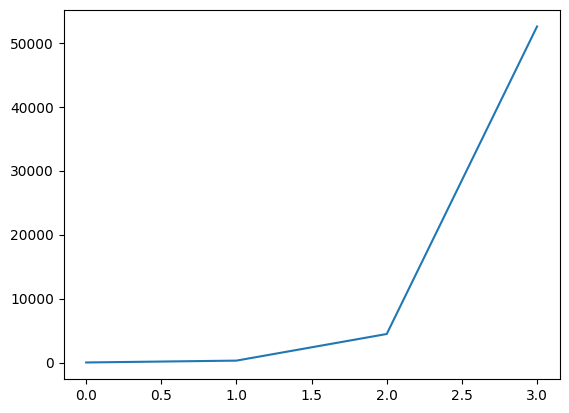

In [40]:
plt.plot(mean_arr_hash)
plt.show()

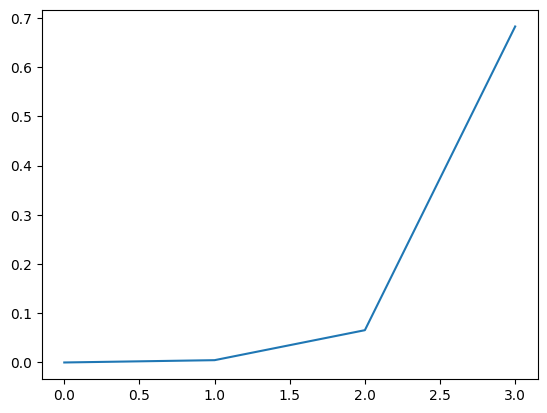

In [41]:
plt.plot(mean_arr_time)
plt.show()

In [42]:
diff_factor_1 = np.mean(hash_array_1)/np.mean(hash_array_0)
diff_factor_2 = np.mean(hash_array_2)/np.mean(hash_array_1)
diff_factor_3 = np.mean(hash_array_3)/np.mean(hash_array_2)
print("Factor of difficulty increase from 1 to 2: {}".format(diff_factor_1))
print("Factor of difficulty increase from 2 to 3: {}".format(diff_factor_2))
print("Factor of difficulty increase from 3 to 4: {}".format(diff_factor_3))

Factor of difficulty increase from 1 to 2: 26.690265486725664
Factor of difficulty increase from 2 to 3: 14.804376657824932
Factor of difficulty increase from 3 to 4: 11.767547592385219
